<a href="https://colab.research.google.com/github/sdmuzel/Web-Scraping/blob/main/Vota%C3%A7%C3%A3o_para_Presidente_da_C%C3%A2mara_dos_Deputados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping - Votação para Presidente da Câmara dos Deputados

Esse projeto foi feito com base na votação para o presidente da câmara dos deputados em 2021

- Dados:https://www.estadao.com.br/infograficos/politica,placar-votos-eleicao-presidente-camara-deputados-2021,1145650

- Tutorial: https://www.youtube.com/watch?v=kqvWOcPog4s

In [1]:
from bs4 import BeautifulSoup
import re
import pandas as pd

Para facilitar a leitura do código desse projeto, o código em html foi armazenado em um arquivo txt


In [7]:
# lendo o arquivo txt
with open("votos.txt", "r") as f:
    html_votos = f.read() # salvando o código html 

html_votos

'div class="custom-main"><div class="custom-section" data-party="PP"><h3 class="custom-section__title">Arthur Lira</h3><p class="custom-section__lead"><span class="custom-section__count">237 votos</span></p><div class="custom-section__representatives"><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204476.jpg" alt="Deputado Federal Chiquinho Brazão (Avante–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/198197.jpg" alt="Deputada Federal Greyce Elias (Avante–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img c

In [8]:
#Parse representa uma análise sintática de uma quantidade de símbolos em alguma linguagem. No caso do javascript, ele interpreta uma 
#string ou conjunto de caracteres, fazendo com que o conteúdo dentro dela seja lido e interpretado corretamente no nosso computador.

soup = BeautifulSoup(html_votos, 'html.parser')

In [22]:
# compreendendo como estão os dados, para realziar as filtragens 
for deputado in soup.find_all("div", attrs={"class": "custom-representative"}):
  print (deputado)

<div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img alt="Deputado Federal Chiquinho Brazão (Avante–RJ)" class="custom-representative__avatar__photo" loading="lazy" pinger-seen="true" src="https://arte.estadao.com.br/public/placar/img/voter/204476.jpg"/></div></div>
<div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img alt="Deputada Federal Greyce Elias (Avante–MG)" class="custom-representative__avatar__photo" loading="lazy" pinger-seen="true" src="https://arte.estadao.com.br/public/placar/img/voter/198197.jpg"/></div></div>
<div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img alt="Deputada Federal Leda Sadala (Avante–AP)" class="custom-representative__avatar__photo" loading="lazy" pinger-seen="true" src="https://arte.estadao.com.br/public/placar/img/voter/204375.jpg"/></div></div>
<div class="custom-representative" data-

In [18]:
votos = [] # criando a lista que vai armazenar os dados dos votos

for deputado in soup.find_all("div", attrs={"class": "custom-representative"}):
  
  # criando uma lista vazia para add as partes dos dadaos 
  dados_deputado = []

  # criando um filtro, com regex, para  encontrar os dados de nome, partido e estado do deputado
  busca_dados = re.search(r'.*Federal (.*)\((.*?)–(.*?)\)',deputado.img['alt'])

 # add os as partes dos dados a lista "dados_deputado"
  dados_deputado.append(deputado['data-choice']) #voto
  dados_deputado.append(busca_dados.group(1))    #nome
  dados_deputado.append(busca_dados.group(2))    #partido
  dados_deputado.append(busca_dados.group(3))    #estado
  dados_deputado.append(deputado.img['src'])     #link

  # add as partes para a lista "votos"
  votos.append(dados_deputado) 

Explicação do filtro realizado com regex

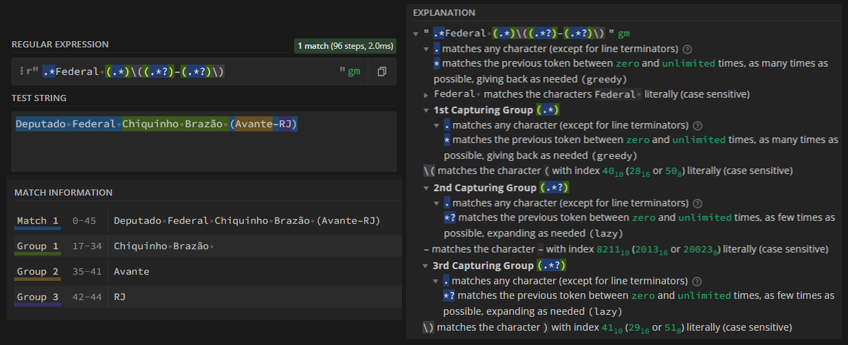

In [19]:
votos_df = pd.DataFrame(votos, columns=['Voto', 'Dep. Federal', 'Partido', 'Estado', 'Imagem'])

In [20]:
votos_df

,Voto,Dep. Federal,Partido,Estado,Imagem
0,Arthur Lira,Chiquinho Brazão,Avante,RJ,https://arte.estadao.com.br/public/placar/img/...
1,Arthur Lira,Greyce Elias,Avante,MG,https://arte.estadao.com.br/public/placar/img/...
2,Arthur Lira,Leda Sadala,Avante,AP,https://arte.estadao.com.br/public/placar/img/...
3,Arthur Lira,Luis Tibé,Avante,MG,https://arte.estadao.com.br/public/placar/img/...
4,Arthur Lira,Sebastião Oliveira,Avante,PE,https://arte.estadao.com.br/public/placar/img/...
...,...,...,...,...,...
508,Não foi encontrado,Emidinho Madeira,PSB,MG,https://arte.estadao.com.br/public/placar/img/...
509,Não foi encontrado,Jefferson Campos,PSB,SP,https://arte.estadao.com.br/public/placar/img/...
510,Não foi encontrado,Mariana Carvalho,PSDB,RO,https://arte.estadao.com.br/public/placar/img/...
511,Não foi encontrado,Célio Moura,PT,TO,https://arte.estadao.com.br/public/placar/img/...


In [23]:
votos_df.to_csv('votos_presidente_camara.csv', index=False)